# Projekt

## 1. Zielsetzung und Datenverständnis

In diesem Projekt wenden wir die Konzepte aus den vorherigen Notebooks auf einen echten Datensatz an. Ziel ist es, mithilfe der bisher erlernten Methoden ein einfaches maschinelles Lernmodell zu entwickeln, das auf Basis physikalischer und materialtechnischer Eigenschaften vorhersagen kann, ob eine Steckverbindung im Laufe der Zeit einen kritischen Widerstand überschreiten wird. Wir werden nicht nur vorhersagen können, **ob** ein kritischer elektrischer Widerstand überschritten wird, sondern auch **wann** dies voraussichtlich geschieht.

### Der Kontext

Steckverbindungen sind essenzielle Bauteile in vielen technischen Systemen – von der Automobilindustrie bis zur Elektronikfertigung. Mit der Zeit und unter Belastung (z. B. durch Vibration oder Temperaturwechsel) kann der elektrische Kontaktwiderstand steigen. Überschreitet er einen bestimmten Schwellenwert (meist 300 mΩ), gilt die Verbindung typischerweise als defekt.

Der vorliegende Datensatz enthält Informationen zu mehreren Steckverbindungen, darunter:

* **Materialeigenschaften** wie die Art der Beschichtung (Silber, Zinn) oder das Vorhandensein einer Zwischenschicht (Nickel),
* **Prozessparameter** wie Normalkraft, Frequenz und Bewegungshub,
* sowie die **Zyklenzahl**, bei der ein bestimmter Widerstandsschwellenwert (z. B. 1 mΩ, 20 mΩ, …, 300 mΩ) erstmals überschritten wurde – falls überhaupt.

### Das Ziel

Ihr werdet ein **zweistufiges Modell** entwickeln:

1. **Klassifikation**:
   Vorhersage, ob eine Steckverbindung **überhaupt** den Schwellenwert von 300 mΩ überschreiten wird.
   → Zielgröße: *Ja (1)* oder *Nein (0)*

2. **Regression** (für die vorhergesagten "Ja"-Fälle):
   Schätzung, **nach wie vielen Belastungszyklen** der Widerstand von 300 mΩ erreicht wird.
   → Zielgröße: *Zyklenanzahl*

Diese Kombination ermöglicht es, zunächst risikobehaftete Steckverbindungen zu identifizieren – und anschließend genauer abzuschätzen, wann voraussichtlich ein kritischer Zustand eintritt, um Wartungsarbeiten einzuleiten.

### Der Datensatz

Die Datei `Schwellenwerte-Table 1.csv` enthält pro Zeile eine Steckverbindung mit:

* einem **Dateinamen** (`Datei`)
* Angaben zu **Material und Prozessparametern**
* Zyklenzahlen, bei denen bestimmte **Ohm-Schwellen überschritten wurden** (z. B. `Zyklus_300_mOhm`)

  * Ein Wert von **-1** bedeutet: Schwelle wurde **nicht** überschritten.

## Aufgabe 1: Überblick verschaffen

Lade die Datei `Schwellenwerte-Table 1.csv` mit `pandas` und verschaffe dir einen Überblick:

* Gib die Form des DataFrames mit `.shape` aus
* Zeige die ersten 5 Zeilen mit `.head()`
* Liste die Spaltennamen auf
* Gib eine Übersicht der statistischen Kenngrößen aus (max, min, std, mean, ...)

In [1]:
### Importiere pandas
import pandas as pd

# Lade die CSV-Datei in einen DataFrame
df = pd.read_csv('../Data/Schwellenwerte-Table 1.csv')

# Zeige die Form des DataFrames, die ersten 5 Zeilen, die Spaltennamen und eine Übersicht der statistischen Kenngrößen an
print(df.shape)

# Zeige die ersten 5 Zeilen des DataFrames
print(df.head())

# Liste die Spaltennamen auf
print(df.columns)

# Gib eine Übersicht der statistischen Kenngrößen aus
print(df.describe())


(99, 14)
                                Datei Beschichtung_Ag_Sn Zwischenschicht_Ni  \
0    AgCu-200µm-1N-75000zyklen-V1.txt               Nein               Nein   
1   AgCu-200µm-2.5N-6100zyklen-V1.txt               Nein               Nein   
2  AgCu-200µm-2.5N-29000zyklen-V1.txt               Nein               Nein   
3     AgCu-200µm-5N-3000zyklen-V1.txt               Nein               Nein   
4    AgCu-200µm-5N-13000zyklen-V1.txt               Nein               Nein   

   Normalkraft  Frequenz  Bewegungshub  Zyklus_1_mOhm  Zyklus_2_mOhm  \
0          1.0         1           200              0             16   
1          2.5         1           200              0              0   
2          2.5         1           200              0           6810   
3          5.0         1           200              0             -1   
4          5.0         1           200              0             -1   

   Zyklus_5_mOhm  Zyklus_10_mOhm  Zyklus_20_mOhm  Zyklus_50_mOhm  \
0        15360.

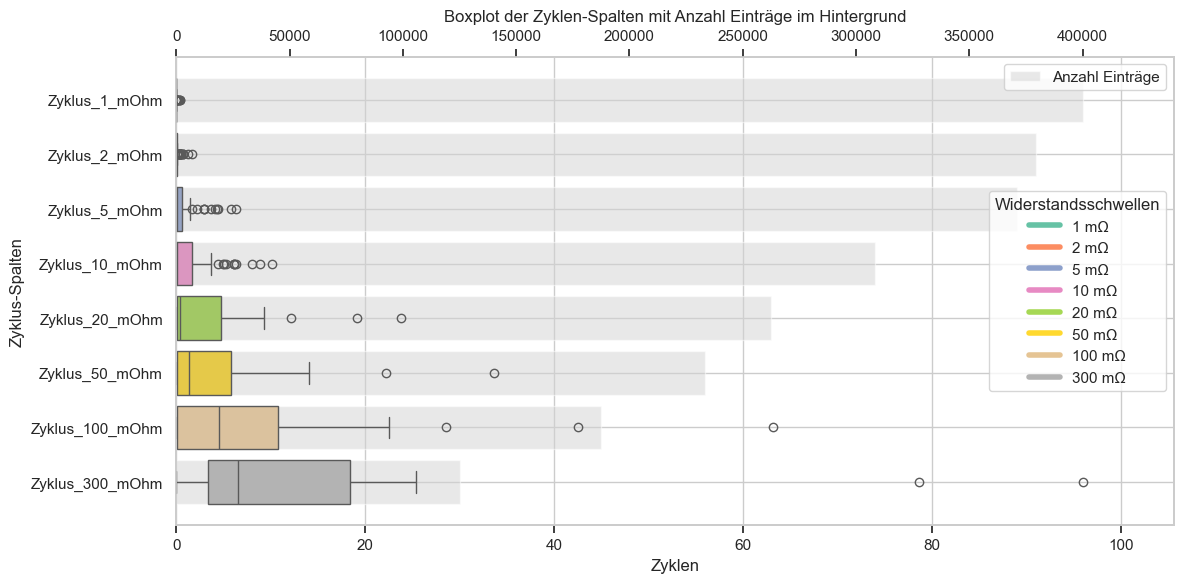

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Zyklen-Spalten extrahieren
zyklus_spalten = [col for col in df.columns if col.startswith('Zyklus_')]
zyklus_df = df[zyklus_spalten]
counts = zyklus_df.count()

palette = sns.color_palette('Set2', n_colors=len(zyklus_spalten))

# Plot erstellen
fig, ax = plt.subplots(figsize=(12, 6))

# Zweite Achse für Balken erstellen
ax1 = ax.twiny()
# Add label for every Zyklus-Spalte
sns.boxplot(data=zyklus_df, ax=ax1, orient='h', palette='Set2', label = '')

# Jetzt den Boxplot in ax (Hauptachse!) zeichnen
ax.barh(zyklus_spalten, counts, color='lightgrey', alpha=0.5, label='Anzahl Einträge')
ax.set_xlim(0, max(counts) * 1.1)  # Setze die x-Achse für die Balken
ax1.set_xlim(0, max(zyklus_df.max()) * 1.1)

# Sichtbarkeit/Ausrichtung justieren
ax.set_xlabel('Zyklen')
ax.set_ylabel('Zyklus-Spalten')
ax.set_title('Boxplot der Zyklen-Spalten mit Anzahl Einträge im Hintergrund')

# Optional: ax1 optisch zurücknehmen
ax1.tick_params(axis='x', labeltop=True, labelbottom=False)
ax1.grid(False)

box_legend = [
    Line2D([0], [0], color=palette[i], lw=4, label=zyklus_spalten[i].replace('Zyklus_', '').replace('_mOhm', ' mΩ'))
    for i in range(len(zyklus_spalten))
]

# Add legend
ax.legend(['Anzahl Einträge'], loc='upper right')
ax1.legend(handles=box_legend, loc='center right', title='Widerstandsschwellen')


plt.tight_layout()
plt.show()


## Aufgabe 2: Fehlende Werte handlen und Datentypen überprüfen

Untersuche die fehlenden Werte:
* Gib die Anzahl der fehlenden Werte pro Spalte aus. Entscheide, was mit fehlenden Daten zu tun ist, falls sie existieren.
* Ersetze dann alle Werte -1 durch `pd.NA`, um deutlich zu machen, dass der dazugehörige Widerstand nicht erreicht wurde.
* Gib die Datentypen aller Spalten mit `.dtypes` aus.

In [2]:
import numpy as np

# Untersuche die fehlenden Werte
print(df.isna().sum())

# Droppe die Reihe mit dem fehlenden Wert in der Spalte 'Zyklus_5_mOhm'
df = df.dropna()

# Ersetze alle Werte -1 durch pd.NA 
df.replace(-1, np.nan, inplace=True)

# Zeige die Datentypen aller Spalten
print(df.dtypes)

Datei                 0
Beschichtung_Ag_Sn    0
Zwischenschicht_Ni    0
Normalkraft           0
Frequenz              0
Bewegungshub          0
Zyklus_1_mOhm         0
Zyklus_2_mOhm         0
Zyklus_5_mOhm         1
Zyklus_10_mOhm        0
Zyklus_20_mOhm        0
Zyklus_50_mOhm        0
Zyklus_100_mOhm       0
Zyklus_300_mOhm       0
dtype: int64
Datei                  object
Beschichtung_Ag_Sn     object
Zwischenschicht_Ni     object
Normalkraft           float64
Frequenz                int64
Bewegungshub            int64
Zyklus_1_mOhm         float64
Zyklus_2_mOhm         float64
Zyklus_5_mOhm         float64
Zyklus_10_mOhm        float64
Zyklus_20_mOhm        float64
Zyklus_50_mOhm        float64
Zyklus_100_mOhm       float64
Zyklus_300_mOhm       float64
dtype: object


In [3]:
from scripts.checker import check_handling_missing_values

check_handling_missing_values(df)

✅ Alle echten NaNs entfernt und -1 korrekt durch NaN ersetzt. 
 -------------------- 
 Info: 

<class 'pandas.core.frame.DataFrame'>
Index: 98 entries, 0 to 98
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Datei               98 non-null     object 
 1   Beschichtung_Ag_Sn  98 non-null     object 
 2   Zwischenschicht_Ni  98 non-null     object 
 3   Normalkraft         98 non-null     float64
 4   Frequenz            98 non-null     int64  
 5   Bewegungshub        98 non-null     int64  
 6   Zyklus_1_mOhm       96 non-null     float64
 7   Zyklus_2_mOhm       91 non-null     float64
 8   Zyklus_5_mOhm       89 non-null     float64
 9   Zyklus_10_mOhm      74 non-null     float64
 10  Zyklus_20_mOhm      63 non-null     float64
 11  Zyklus_50_mOhm      56 non-null     float64
 12  Zyklus_100_mOhm     45 non-null     float64
 13  Zyklus_300_mOhm     30 non-null     float64
dtypes: float64(9), int

## Aufgabe 3: Zielvariable erstellen

Erstelle eine Spalte namens `target`, die wie folgt definiert ist:

* **1**, wenn `Zyklus_300_mOhm` einen Wert größer als 0 enthält
* **0**, wenn der Wert 0 oder NaN ist

In [3]:
df["target"] = (df["Zyklus_300_mOhm"] > 0).astype(int)

In [5]:
from scripts.checker import check_target_column
check_target_column(df)

✅ Zielvariable korrekt erstellt: 
     target
0        1
1        0
2        1
3        0
4        0
..     ...
94       1
95       0
96       0
97       0
98       0

[98 rows x 1 columns]


## Aufgabe 4: One-Hot-Encoding und Standardisierung

Bereite den Datensatz für das Modell vor:

1. Wandle **kategorische Variablen** in numerische mit One-Hot-Encoding um. Vermeide Multikollinearität.
2. Standardisiere alle **numerischen Features**, z. B. mit `StandardScaler` von scikit-learn
3. Speichere die verarbeiteten Features in einer neuen Variable `X_processed`

In [4]:
from sklearn.preprocessing import StandardScaler

# Features
features = ["Beschichtung_Ag_Sn", "Zwischenschicht_Ni", "Normalkraft", "Frequenz", "Bewegungshub", "Zyklus_1_mOhm", "Zyklus_2_mOhm", "Zyklus_5_mOhm", "Zyklus_10_mOhm", "Zyklus_20_mOhm", "Zyklus_50_mOhm", "Zyklus_100_mOhm", "Zyklus_300_mOhm"]

# Nur relevante Features extrahieren
X = df[features].copy()

# One-Hot-Encoding für kategorische Variablen
X_encoded = pd.get_dummies(X, columns=["Beschichtung_Ag_Sn", "Zwischenschicht_Ni"], drop_first=True)

# Standardisierung numerischer Spalten
numerical_cols = ["Normalkraft", "Frequenz", "Bewegungshub", "Zyklus_1_mOhm", "Zyklus_2_mOhm", "Zyklus_5_mOhm", "Zyklus_10_mOhm", "Zyklus_20_mOhm", "Zyklus_50_mOhm", "Zyklus_100_mOhm", "Zyklus_300_mOhm"]
scaler = StandardScaler()
X_encoded[numerical_cols] = scaler.fit_transform(X_encoded[numerical_cols])

# Fertige Matrix
X_processed = X_encoded


In [7]:
print(X_processed.head())

   Normalkraft  Frequenz  Bewegungshub  Zyklus_1_mOhm  Zyklus_2_mOhm  \
0    -0.565788 -3.605551      2.169753      -0.289815      -0.418103   
1     0.015826 -3.605551      2.169753      -0.289815      -0.432383   
2     0.015826 -3.605551      2.169753      -0.289815       5.645553   
3     0.985183 -3.605551      2.169753      -0.289815            NaN   
4     0.985183 -3.605551      2.169753      -0.289815            NaN   

   Zyklus_5_mOhm  Zyklus_10_mOhm  Zyklus_20_mOhm  Zyklus_50_mOhm  \
0       2.299795        3.720450        2.065106        1.396146   
1      -0.517401       -0.591232       -0.639780       -0.646652   
2       3.956731        2.077460        0.771686        0.431586   
3            NaN             NaN             NaN             NaN   
4            NaN             NaN             NaN             NaN   

   Zyklus_100_mOhm  Zyklus_300_mOhm  Beschichtung_Ag_Sn_Nein  \
0         0.282468        -0.079533                     True   
1        -0.707176        -0.6

In [7]:
from scripts.checker import check_preprocessing
check_preprocessing(X_processed)

Berechnete Mittelwerte und Standardabweichungen:
Mittelwerte: 
 Normalkraft        6.060911e-17
Frequenz           1.212182e-16
Bewegungshub       1.246169e-17
Zyklus_1_mOhm      3.816392e-17
Zyklus_2_mOhm      4.880101e-18
Zyklus_5_mOhm      4.989766e-18
Zyklus_10_mOhm     4.650934e-17
Zyklus_20_mOhm     1.938485e-17
Zyklus_50_mOhm     5.947623e-18
Zyklus_100_mOhm    4.934325e-17
Zyklus_300_mOhm    5.921189e-17
dtype: float64
Standardabweichungen: 
 Normalkraft        1.0
Frequenz           1.0
Bewegungshub       1.0
Zyklus_1_mOhm      1.0
Zyklus_2_mOhm      1.0
Zyklus_5_mOhm      1.0
Zyklus_10_mOhm     1.0
Zyklus_20_mOhm     1.0
Zyklus_50_mOhm     1.0
Zyklus_100_mOhm    1.0
Zyklus_300_mOhm    1.0
dtype: float64
✅ One-Hot-Encoding & Standardisierung korrekt!


## Aufgabe 5: Daten in Trainings- und Testmenge aufteilen

Teile die Features `X_prepared` und Labels `df["target"]` in Trainings- und Testdaten auf.

Anforderungen:
* 80 % Training, 20 % Test
* Speichere die Arrays als:
  - `X_train`, `X_test`
  - `y_train`, `y_test`
* Setze `random_state=42` für Reproduzierbarkeit

In [11]:
from sklearn.model_selection import train_test_split

y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)

In [12]:
### Überprüft eure Lösung
from scripts.checker import check_split
check_split(X_train, X_test, y_train, y_test, y)

✅ Aufteilung erfolgreich!


## Aufgabe 6: Logistisches Regressionsmodell trainieren

Trainiere ein logistisches Regressionsmodell auf den Trainingsdaten.

Anforderungen:
* Verwende `LogisticRegression` aus `sklearn.linear_model`
* Speichere das Modell in einer Variable `model`
* Trainiere mit `.fit(X_train, y_train)`

In [13]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
from scripts.checker import check_model_training
# check_model_training(<>Hier euer model, X_train, y_train einfügen<>)

## Aufgabe 7: Scatterplot der Vorhersagen

Visualisiere die Modellvorhersagen mithilfe eines Scatterplots:

Schritte:
1. Wähle zwei numerische Features, z. B. `Kontaktkraft_N` und `Steckzyklen`
2. Plotte die Testdaten in diesen zwei Dimensionen
3. Farbe: Nutze `model.predict(X_test)` als Farbe (0 oder 1)


In [ ]:
### Hier ist Platz für eure Lösung

## Aufgabe 8: Modell evaluieren

Bewerte die Qualität deiner Vorhersagen auf dem Testdatensatz.

Berechne folgende Metriken mit scikit-learn:

- Accuracy
- Precision
- Recall
- F1-Score
- Confusion Matrix
- ROC-AUC

> Hinweis: Verwende `model.predict(X_test)` für die Klassenvorhersage und `model.predict_proba(X_test)[:, 1]` für Wahrscheinlichkeiten.

Speichere die Vorhersagen in `y_pred` und die Wahrscheinlichkeiten in `y_prob`.

In [ ]:
### Hier ist Platz für eure Lösung

In [ ]:
### Überprüft eure Lösung
from scripts.checker import check_metrics
# check_metrics(<>Hier eure y_test, y_pred, y_prob einfügen<>)

## Aufgabe 9: Interpretation der Feature-Gewichte

Nutze die Koeffizienten des Modells, um zu verstehen, welche Features das Modell beeinflussen.

Schritte:
1. Erstelle ein DataFrame, das die Features (`X_prepared.columns`) den zugehörigen Koeffizienten (`model.coef_`) gegenüberstellt.
2. Sortiere es nach der Stärke des Einflusses (positiv oder negativ).
3. Stelle die Top-10 wichtigsten Features in einem Balkendiagramm dar.


In [ ]:
### Hier ist Platz für eure Lösung

In [ ]:
### Überprüft eure Lösung
from scripts.checker import check_coefficients
# check_coefficients(<>Hier euer model, X_prepared einfügen<>)